In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt



In [52]:
data = pd.read_csv('fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [46]:
data.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [53]:
data['fraud'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [48]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
fraud              object
dtype: object

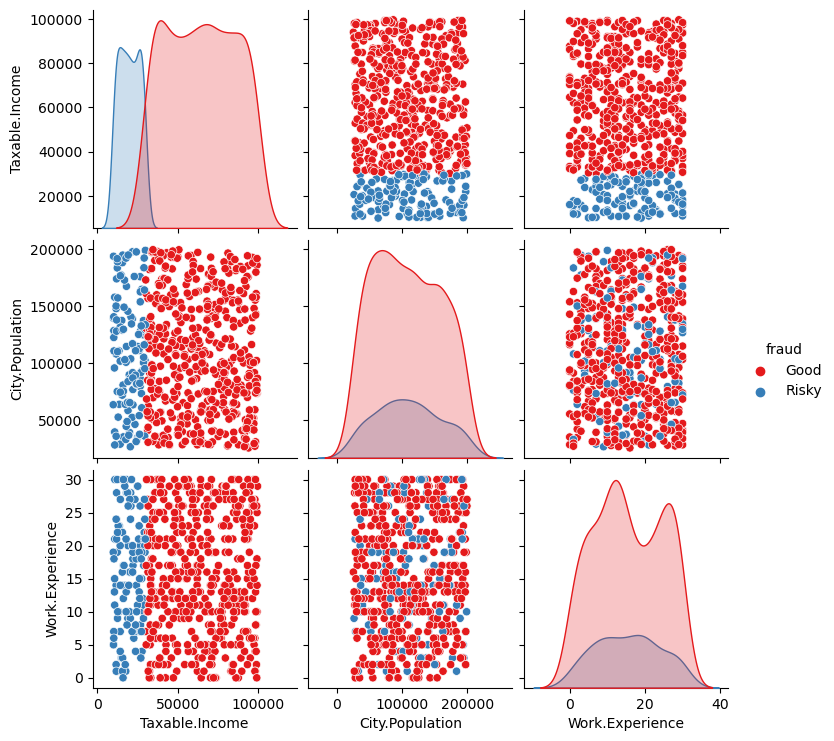

In [49]:
# Create a pairplot for visualization
sns.pairplot(data, hue='fraud', palette='Set1')
plt.show()

In [54]:
# Select relevant features
features = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

# Create dummy variables for categorical features
data = pd.get_dummies(data, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

# Create the 'features' list using the names of the dummy columns
features = data.columns.tolist()
features.remove('fraud')  # Remove the target variable

# Split the data into features and target variable
X = data[features]
y = data['fraud']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
def confusion_matri(cf_matrix):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    plt.show()
    

In [56]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    cf_matrix = confusion_matrix(y_test,preds)
    confusion_matri(cf_matrix)

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



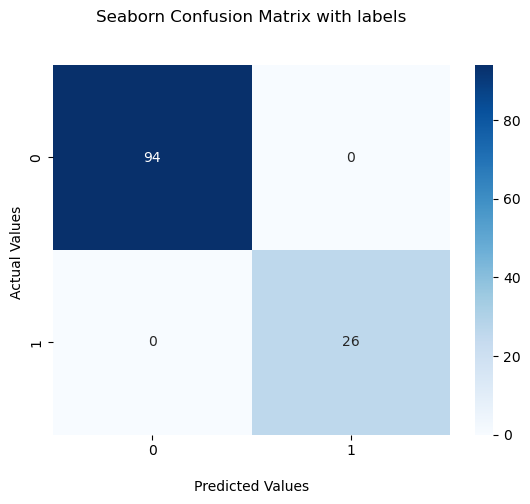

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier using entropy criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
clf_entropy.fit(X_train, y_train)


report(clf_entropy)

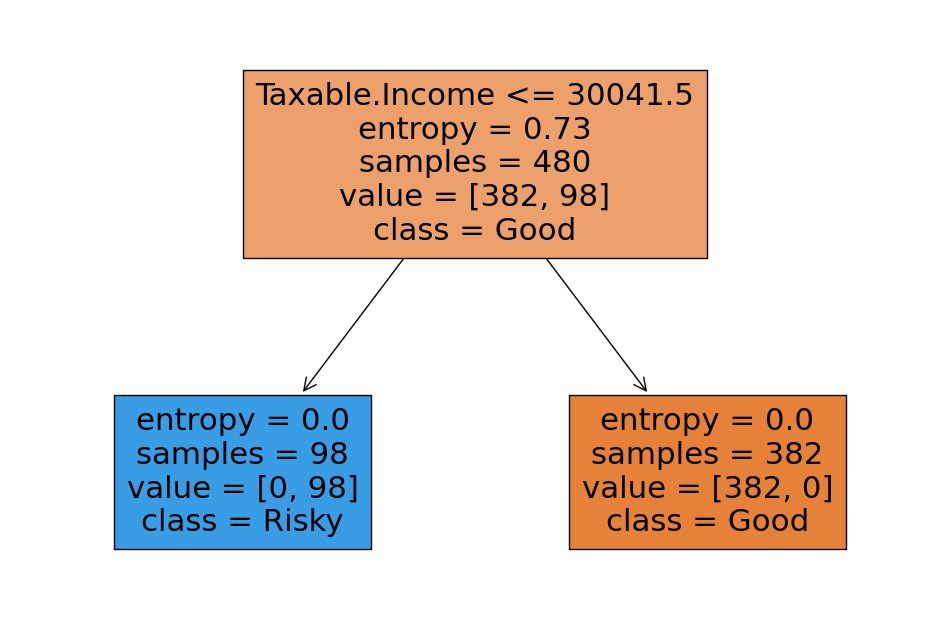

In [59]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Good', 'Risky'])
plt.show()


              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



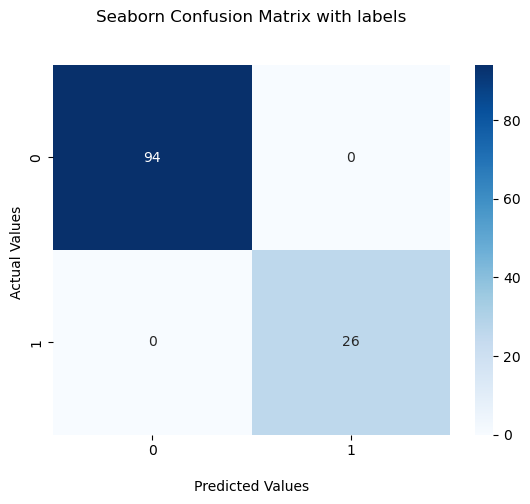

In [64]:
# Create a Decision Tree Classifier using Gini impurity (CART method)
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42,max_leaf_nodes=2)

# Train the model
clf_gini.fit(X_train, y_train)

# Make predictions

report(clf_gini)

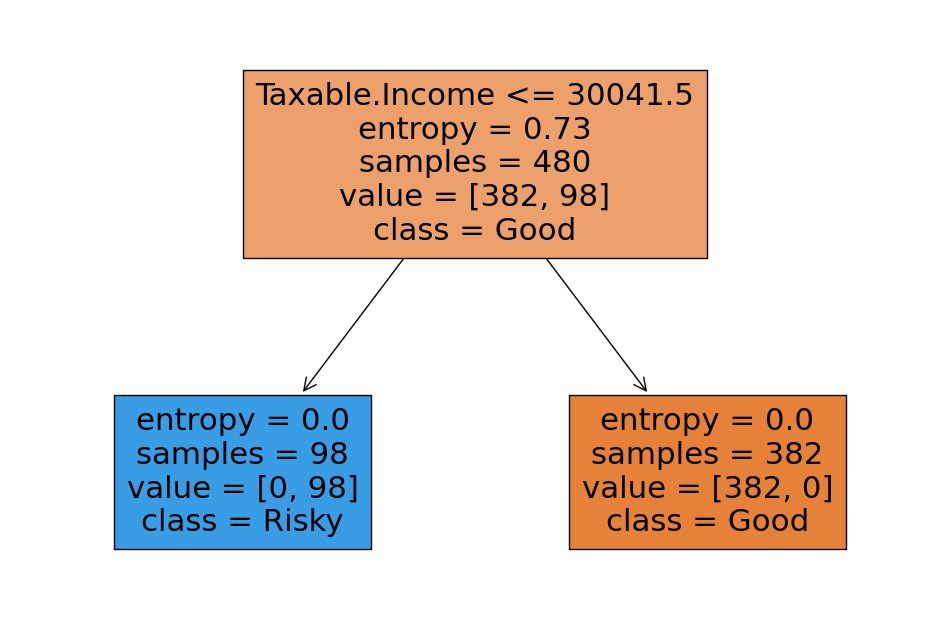

In [65]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Good', 'Risky'])
plt.show()



## Decision Tree Regressor
### Default Parameters

In [69]:
# Encode 'Good' as 1 and 'Risky' as 0 in the target variable
y_train_encoded = y_train.map({'Good': 1, 'Risky': 0})

In [73]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train_encoded)


DecisionTreeRegressor()

In [74]:
base_pred2 = model2.predict(X_test)

In [71]:
# Create a DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor model
regressor.fit(X_train, y_train_encoded)


DecisionTreeRegressor(random_state=42)

In [76]:
# Assuming base_pred2 contains numeric labels 0 and 1
# Convert 0 to 'Risky' and 1 to 'Good' in base_pred2
base_pred2 = ['Risky' if pred == 0 else 'Good' for pred in base_pred2]
confusion_matrix(y_test,base_pred2)

array([[94,  0],
       [ 0, 26]], dtype=int64)

In [77]:
print(classification_report(y_test,base_pred2))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



-The dataset was quite straight forward and linear. It didnt not have any other bias. 